In [0]:
import keras
keras.__version__

'2.2.4'

# SimpleRNN

In [0]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


입력데이터 (batch_size, timesteps, input_features)

### SimpleRNN 두 가지 모드

1) 각 타임스텝의 출력을 모은 전체 시퀀스를 반환(크기가 `(batch_size, timesteps, output_features)`인 3D 텐서

2) 입력 시퀀스에 대한 마지막 출력만 반환(크기가 `(batch_size, output_features)`인 2D 텐서). 이 모드는 객체를 생성할 때 `return_sequences` 매개변수로 선택할 수 있습니다.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


네트워크의 표현력을 증가시키기 위해 여러 개의 순환 층을 차례대로 쌓음

In [0]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


IMDB 영화 리뷰 분류 문제
 - 데이터 전처리

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


`Embedding` 층과 `SimpleRNN` 층을 사용해 간단한 순환 네트워크를 학습


In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))    #10000
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop'
              , loss='binary_crossentropy'
              , metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.6443 - acc: 0.6121 - val_loss: 0.5934 - val_acc: 0.6722
Epoch 2/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4392 - acc: 0.8077 - val_loss: 0.4324 - val_acc: 0.8114
Epoch 3/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.3227 - acc: 0.8687 - val_loss: 0.4221 - val_acc: 0.8138
Epoch 4/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.2470 - acc: 0.9023 - val_loss: 0.4400 - val_acc: 0.8022
Epoch 5/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1917 - acc: 0.9267 - val_loss: 0.3538 - val_acc: 0.8674
Epoch 6/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.1294 - acc: 0.9543 - val_loss: 0.4043 - val_acc: 0.8412
Epoch 7/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.0856 - acc: 0.9719 - val_loss: 0.4215 - val_acc:

In [0]:
input_train.shape

(25000, 500)

### Accuracy & Loss

In [0]:
import matplotlib.pyplot as plt

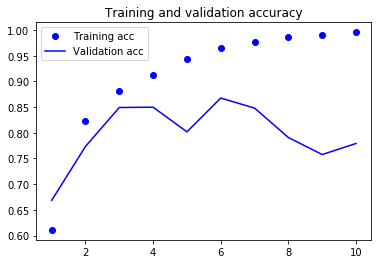

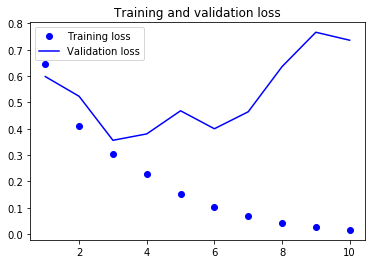

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

SimpleRNN 기존모델(logistic regression)보다 성능이 높지 않음(85% 정도의 val_acc). 이런 원인은 전체 시퀀스가 아니라 처음 500개의 단어만 입력에 사용했기 때문

## LSTM 예제

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 223s 11ms/step - loss: 0.5087 - acc: 0.7638 - val_loss: 0.3793 - val_acc: 0.8470
Epoch 2/10
20000/20000 [==============================] - 214s 11ms/step - loss: 0.2933 - acc: 0.8849 - val_loss: 0.3141 - val_acc: 0.8620
Epoch 3/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.2305 - acc: 0.9107 - val_loss: 0.2871 - val_acc: 0.8904
Epoch 4/10
20000/20000 [==============================] - 216s 11ms/step - loss: 0.2004 - acc: 0.9275 - val_loss: 0.3227 - val_acc: 0.8600
Epoch 5/10
20000/20000 [==============================] - 216s 11ms/step - loss: 0.1751 - acc: 0.9354 - val_loss: 0.2931 - val_acc: 0.8746
Epoch 6/10
20000/20000 [==============================] - 219s 11ms/step - loss: 0.1575 - acc: 0.9420 - val_loss: 0.4278 - val_acc: 0.8670
Epoch 7/10
20000/20000 [==============================] - 220s 11ms/step - loss: 0.1422 - acc: 0.9499 - val_loss: 0.3

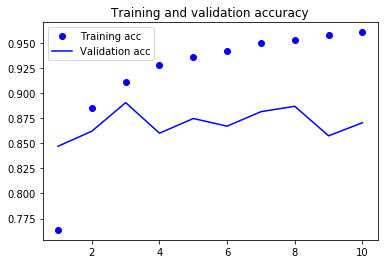

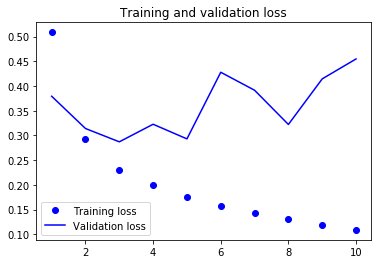

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()